# Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import itertools
from sklearn.metrics import precision_recall_curve,average_precision_score, accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv')

# Exploratory Data Analysis

In [4]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


#### Describing column names:

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#### Describing the type of column the dataset have.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### Insight:

From the above table we can see that most of the columns are of type object and few are of type float. so we need to encode these columns.

#### Describe function ignores missing values and categorical values.

#### to show all values we can add parameter include all.

In [7]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [8]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [9]:
noOfRows=df.shape[0] 

#### Getting percentage of heart disease patients

In [10]:
df['HeartDisease'].value_counts()/noOfRows*100

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64

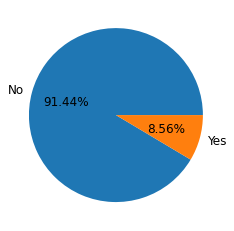

In [11]:
fig,ax = plt.subplots(figsize=(8,4))
labels = df['HeartDisease'].unique()

#using pie chart
ax.pie(df['HeartDisease'].value_counts(), labels=labels,autopct='%1.2f%%',textprops = {"fontsize":12})
plt.show()

#### Insight:
From the above chart we can see that only 8.5% are at a risk of heart disease out of the total 319795. Which shows that the data is imbalanced

### Features extraction and cleaning

In [12]:
copy_df=df.copy()

#### Changing the values from string to numeric.

In [13]:
copy_df.loc[copy_df['HeartDisease'] =='Yes','HeartDisease']=1
copy_df.loc[copy_df['HeartDisease'] == 'No','HeartDisease']=0

#### BMI

In [14]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI'>

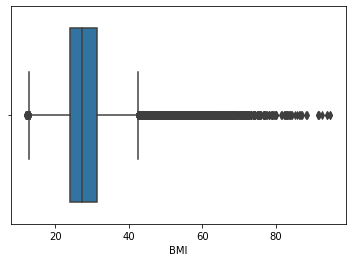

In [15]:
sns.boxplot(data=df, x='BMI')

#### Insight:
from the above chart, we can see that the data is spreaded.

#### Changing the data into categorical based on health industry specification of USA.

In [16]:
t=df['BMI']
cond = [(t.between(0,18.5)),(t.between(18.5,24.9)),(t.between(24.9,29.9)),(t.between(29.9,34.9)), (t.between(34.9,100))]

# Uwt-underweight, N-normal, Owt-overweight, O-Obese, EO-extremely obese
labels = ['Uwt','N','Owt','O','EO']     

df['BMI_cat'] = np.select(cond,labels)

In [17]:
df.drop(columns=['BMI'],inplace=True)

In [18]:
df['BMI_cat'].value_counts()

Owt    114752
N       95134
O       62172
EO      42623
Uwt      5114
Name: BMI_cat, dtype: int64

#### Insight:
from the above analysis we can see that most of the people in our dataset is overweight.

In [19]:
copy_df['BMI_cat']=df['BMI_cat']
t1=copy_df[["HeartDisease",'BMI_cat']].groupby(['BMI_cat'],as_index=False).mean()

<AxesSubplot:xlabel='BMI_cat', ylabel='HeartDisease'>

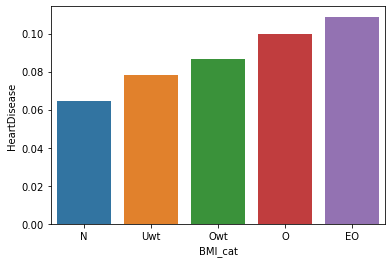

In [20]:
sns.barplot(data=t1.sort_values(by='HeartDisease'),x='BMI_cat',y='HeartDisease')

#### Insight:
From the above chart we can see that the one who lies in extremely obese category have the highest risk of getting heart disease.

#### PhyiscalHealth

In [21]:
df['PhysicalHealth'].describe()

count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

<AxesSubplot:xlabel='PhysicalHealth'>

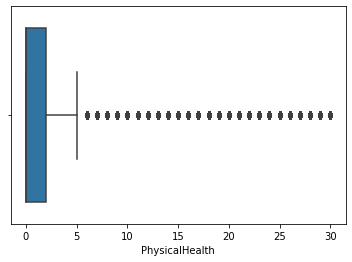

In [22]:
sns.boxplot(data=df, x='PhysicalHealth')

<AxesSubplot:xlabel='HeartDisease', ylabel='PhysicalHealth'>

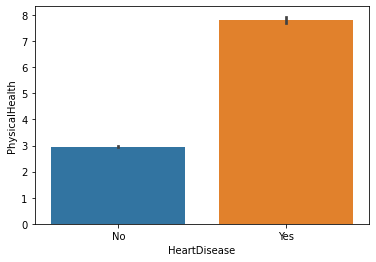

In [23]:
sns.barplot(y='PhysicalHealth',data=df,x='HeartDisease')

#### Insight:
Physical health do conclude in heart disease according to the data.

#### MentalHealth

In [24]:
df['MentalHealth'].describe()

count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

In [25]:
df['MentalHealth'].value_counts()

0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     10513
3.0      10466
15.0      9896
1.0       9291
7.0       5528
20.0      5431
4.0       5379
14.0      2048
25.0      1954
6.0       1510
8.0       1094
12.0       757
28.0       515
21.0       352
29.0       317
18.0       211
9.0        203
16.0       152
17.0       128
27.0       126
13.0       110
22.0        98
11.0        83
23.0        68
24.0        67
26.0        59
19.0        21
Name: MentalHealth, dtype: int64

<AxesSubplot:xlabel='MentalHealth'>

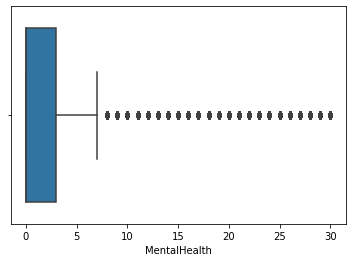

In [26]:
sns.boxplot(data=df, x='MentalHealth')


<AxesSubplot:xlabel='HeartDisease', ylabel='MentalHealth'>

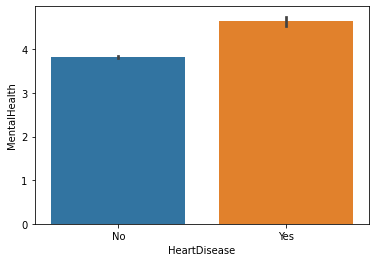

In [27]:
sns.barplot(y='MentalHealth',data=df,x='HeartDisease')

#### Insight:
From the above chart we can see that mental health doesnt really affect so we can drop this col.

In [28]:
df.drop(columns='MentalHealth', inplace=True)

#### SleepTime

In [29]:
df['SleepTime'].describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

#### Insight:
the max is value is 24 and the central is 7.

In [30]:
df['SleepTime'].value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

<AxesSubplot:xlabel='SleepTime'>

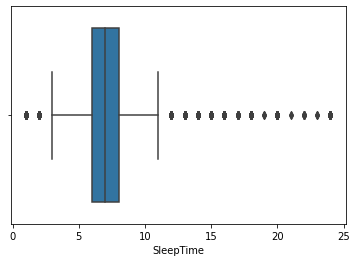

In [31]:
sns.boxplot(data=df, x='SleepTime')

In [32]:
t2=copy_df[["HeartDisease",'SleepTime']].groupby(['SleepTime'],as_index=False).mean()

<AxesSubplot:xlabel='SleepTime', ylabel='HeartDisease'>

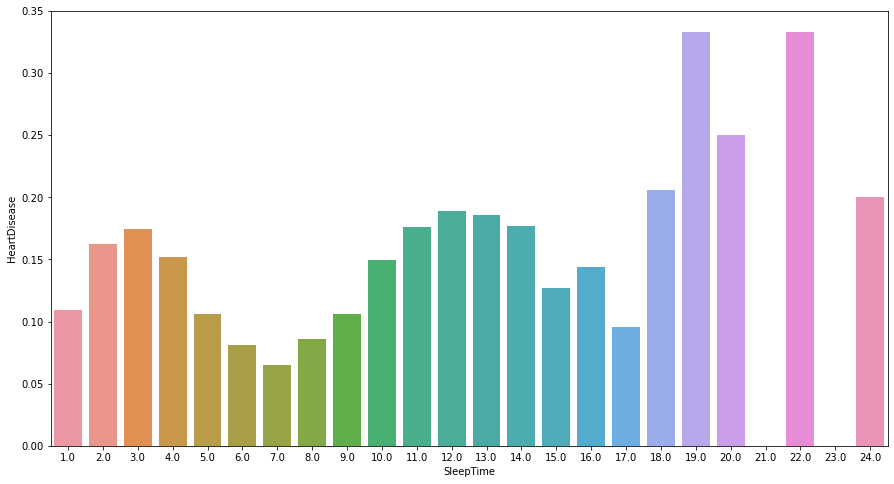

In [33]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data=t2.sort_values(by='HeartDisease'),x='SleepTime',y='HeartDisease')

#### Insight:
From the above chart we can see that those who sleep less or those who sleep more than 7 hours have higher risk of heart disease.

In [34]:
st=df['SleepTime']
cond = [(st.between(0,6)),(st.between(6,9)),(st.between(9,24))]

labels = ['Low','Normal','High']

df['SleepTime_cat'] = np.select(cond,labels)

In [35]:
df.drop(columns=['SleepTime'],inplace=True)

In [36]:
df['SleepTime_cat'].value_counts()

Normal    211394
Low        96986
High       11415
Name: SleepTime_cat, dtype: int64

In [37]:
copy_df['SleepTime_cat']=df['SleepTime_cat']
t3=copy_df[["HeartDisease",'SleepTime_cat']].groupby(['SleepTime_cat'],as_index=False).mean()

<AxesSubplot:xlabel='SleepTime_cat', ylabel='HeartDisease'>

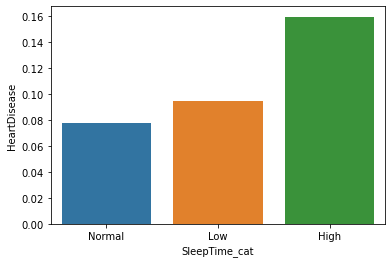

In [38]:
sns.barplot(data=t3.sort_values(by='HeartDisease'),x='SleepTime_cat',y='HeartDisease')

#### GenHealth

In [39]:
df['GenHealth'].value_counts()/noOfRows*100

Very good    35.603433
Good         29.121468
Excellent    20.901515
Fair         10.843509
Poor          3.530074
Name: GenHealth, dtype: float64

In [40]:
t4=copy_df[["HeartDisease",'GenHealth']].groupby(['GenHealth'],as_index=False).mean()

<AxesSubplot:xlabel='GenHealth', ylabel='HeartDisease'>

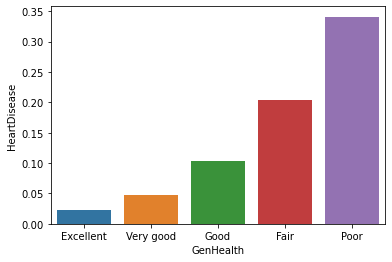

In [41]:
sns.barplot(data=t4.sort_values(by='HeartDisease'),x='GenHealth',y='HeartDisease')

#### Insight:
From the above chart we can see that you are most likely have heart disease if your general health is poor but the data surprisingly shows that even if your general health is good, you can have heart disease.

#### Physcial Activity

In [42]:
df['PhysicalActivity'].value_counts()/noOfRows*100

Yes    77.536234
No     22.463766
Name: PhysicalActivity, dtype: float64

In [43]:
t5=copy_df[["HeartDisease",'PhysicalActivity']].groupby(['PhysicalActivity'],as_index=False).mean()

<AxesSubplot:xlabel='PhysicalActivity', ylabel='HeartDisease'>

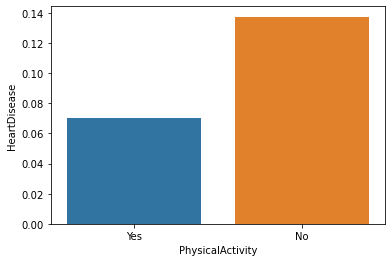

In [44]:
sns.barplot(data=t5.sort_values(by='HeartDisease'),x='PhysicalActivity',y='HeartDisease')

#### Insight:
From the above chart we can clearly see that phyiscal activity can help in preventing heart disease.

#### Asthma

In [45]:
df['Asthma'].value_counts()/noOfRows*100

No     86.593912
Yes    13.406088
Name: Asthma, dtype: float64

In [46]:
t6=copy_df[["HeartDisease",'Asthma']].groupby(['Asthma'],as_index=False).mean()

<AxesSubplot:xlabel='Asthma', ylabel='HeartDisease'>

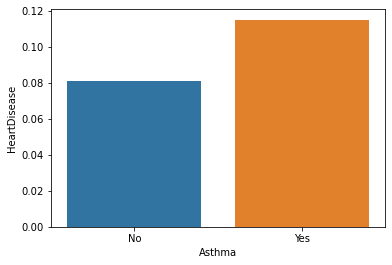

In [47]:
sns.barplot(data=t6.sort_values(by='HeartDisease'),x='Asthma',y='HeartDisease')

#### Insight:
The above chart shows that ashtma can lead to heart disease.

In [48]:
#SkinCancer

In [49]:
df['SkinCancer'].value_counts()/noOfRows*100

No     90.675589
Yes     9.324411
Name: SkinCancer, dtype: float64

In [50]:
t7=copy_df[["HeartDisease",'SkinCancer']].groupby(['SkinCancer'],as_index=False).mean()

<AxesSubplot:xlabel='SkinCancer', ylabel='HeartDisease'>

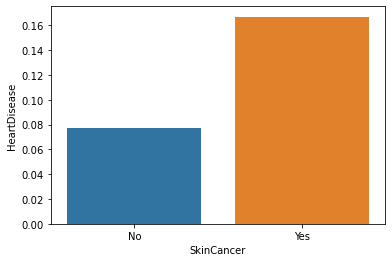

In [51]:
sns.barplot(data=t7.sort_values(by='HeartDisease'),x='SkinCancer',y='HeartDisease')

In [52]:
#KidneyDisease

In [53]:
df['KidneyDisease'].value_counts()/noOfRows*100

No     96.316703
Yes     3.683297
Name: KidneyDisease, dtype: float64

In [54]:
t8=copy_df[["HeartDisease",'KidneyDisease']].groupby(['KidneyDisease'],as_index=False).mean()

<AxesSubplot:xlabel='KidneyDisease', ylabel='HeartDisease'>

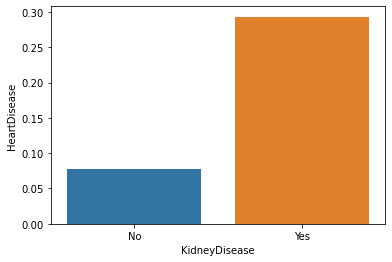

In [55]:
sns.barplot(data=t8.sort_values(by='HeartDisease'),x='KidneyDisease',y='HeartDisease')

In [56]:
#Diabetic

In [57]:
df['Diabetic'].value_counts()/noOfRows*100

No                         84.320580
Yes                        12.758799
No, borderline diabetes     2.120421
Yes (during pregnancy)      0.800200
Name: Diabetic, dtype: float64

In [58]:
t9=copy_df[["HeartDisease",'Diabetic']].groupby(['Diabetic'],as_index=False).mean()

<AxesSubplot:xlabel='Diabetic', ylabel='HeartDisease'>

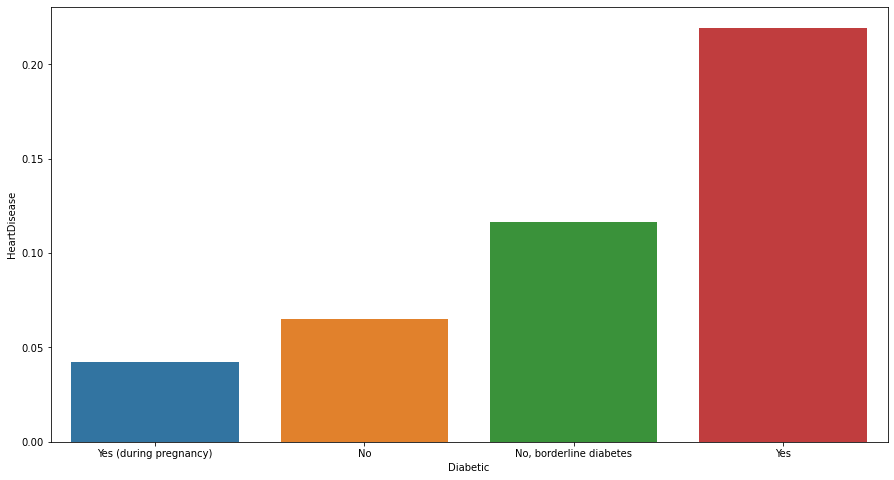

In [59]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data=t9.sort_values(by='HeartDisease'),x='Diabetic',y='HeartDisease')

In [60]:
## People with Diabetes are at higher risk of a heart disease

In [61]:
#Race

In [62]:
df['Race'].value_counts()/noOfRows*100

White                             76.677872
Hispanic                           8.582373
Black                              7.173033
Other                              3.417189
Asian                              2.522866
American Indian/Alaskan Native     1.626667
Name: Race, dtype: float64

In [63]:
t10=copy_df[["HeartDisease",'Race']].groupby(['Race'],as_index=False).mean()

<AxesSubplot:xlabel='Race', ylabel='HeartDisease'>

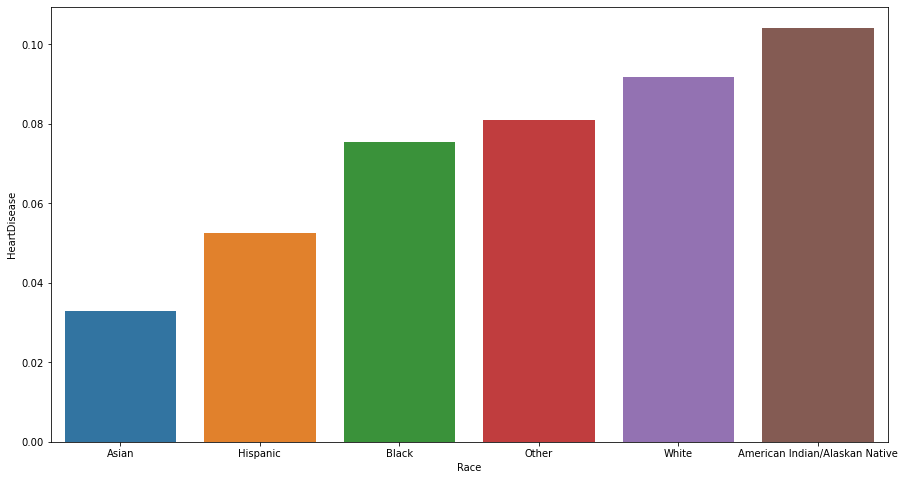

In [64]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data=t10.sort_values(by='HeartDisease'),x='Race',y='HeartDisease')

In [65]:
## The Native Americans look to be at higher risk of the heart disease, which according to recent reports by CDC also is shown
## that heart disease is a leading cause of death amongst them and they are more likely to develop a heart issue than the white
## people. The asians seem to be having the lowest risk for a heart disease.

In [66]:
#AgeCategory

In [67]:
df['AgeCategory'].value_counts()/noOfRows*100

65-69          10.679029
60-64          10.533623
70-74           9.714036
55-59           9.305024
50-54           7.936960
80 or older     7.552651
45-49           6.814053
75-79           6.717428
18-24           6.586720
40-44           6.568583
35-39           6.425992
30-34           5.864069
25-29           5.301834
Name: AgeCategory, dtype: float64

In [68]:
t10=copy_df[["HeartDisease",'AgeCategory']].groupby(['AgeCategory'],as_index=False).mean()

<AxesSubplot:xlabel='AgeCategory', ylabel='HeartDisease'>

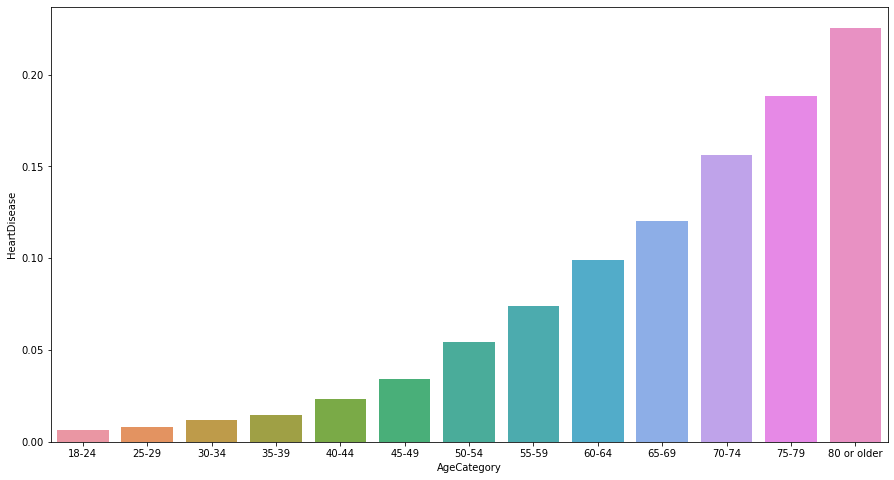

In [69]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data=t10.sort_values(by='HeartDisease'),x='AgeCategory',y='HeartDisease')

In [70]:
## we could see here that the risk of heart disease increases with age

In [71]:
## Let us replace the category of Age with the mean value in that range (or we can do encoding aswell)

In [72]:
AgeCategory_mean = {'18-24':21,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52,'55-59':57, 
                    '60-64':62,'65-69':67,'70-74':72,'75-79':77,'80 or older':80}

df['Mean_Age'] = df['AgeCategory'].apply(lambda x: AgeCategory_mean[x])

In [73]:
df.drop(columns=['AgeCategory'],inplace=True)

In [74]:
#Sex

In [75]:
df['Sex'].value_counts()/noOfRows*100

Female    52.472678
Male      47.527322
Name: Sex, dtype: float64

In [76]:
t11=copy_df[["HeartDisease",'Sex']].groupby(['Sex'],as_index=False).mean()

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

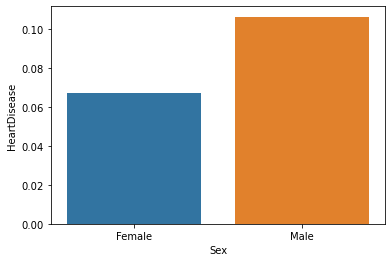

In [77]:
sns.barplot(data=t11.sort_values(by='HeartDisease'),x='Sex',y='HeartDisease')


In [78]:
#DiffWalking

In [79]:
df['DiffWalking'].value_counts()/noOfRows*100

No     86.112979
Yes    13.887021
Name: DiffWalking, dtype: float64

In [80]:
t12=copy_df[["HeartDisease",'DiffWalking']].groupby(['DiffWalking'],as_index=False).mean()

<AxesSubplot:xlabel='DiffWalking', ylabel='HeartDisease'>

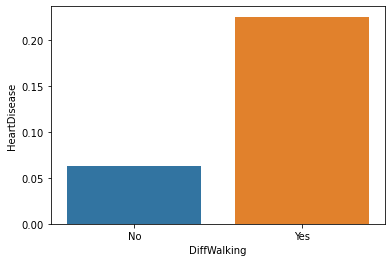

In [81]:
sns.barplot(data=t12.sort_values(by='HeartDisease'),x='DiffWalking',y='HeartDisease')

In [82]:
## Difficulty in walking is also a good indicator for heart problem

In [83]:
#Stroke

In [84]:
df['Stroke'].value_counts()/noOfRows*100

No     96.22602
Yes     3.77398
Name: Stroke, dtype: float64

In [85]:
t13=copy_df[["HeartDisease",'Stroke']].groupby(['Stroke'],as_index=False).mean()

<AxesSubplot:xlabel='Stroke', ylabel='HeartDisease'>

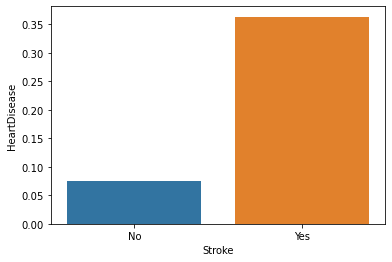

In [86]:
sns.barplot(data=t13.sort_values(by='HeartDisease'),x='Stroke',y='HeartDisease')


In [87]:
## So a past stroke could be a big indicator for heart disease

In [88]:
#AlcoholDrinking

In [89]:
df['AlcoholDrinking'].value_counts()/noOfRows*100

No     93.190325
Yes     6.809675
Name: AlcoholDrinking, dtype: float64

In [90]:
t14=copy_df[["HeartDisease",'AlcoholDrinking']].groupby(['AlcoholDrinking'],as_index=False).mean()


<AxesSubplot:xlabel='AlcoholDrinking', ylabel='HeartDisease'>

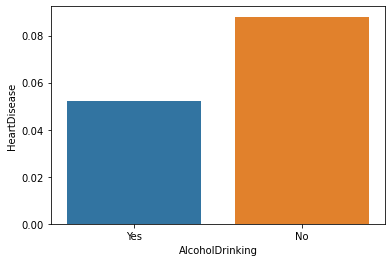

In [91]:
sns.barplot(data=t14.sort_values(by='HeartDisease'),x='AlcoholDrinking',y='HeartDisease')


In [92]:
## Since there are very few heavy drinkers (6.8%), so people with high heart problem risk dont look to be influenced by heavy drinking

In [93]:
df[df['AlcoholDrinking']=='Yes']['HeartDisease'].value_counts()

No     20636
Yes     1141
Name: HeartDisease, dtype: int64

In [94]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [95]:
## Only 4% (1141/27373*100) of people with heart disease are heavy drinkers, so this might not be that good indicator for heart disease, and
## it's better to drop it

In [96]:
df.drop(columns='AlcoholDrinking', inplace=True)

In [97]:
#Smoking

In [98]:
df['Smoking'].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [99]:
t15=copy_df[["HeartDisease",'Smoking']].groupby(['Smoking'],as_index=False).mean()

<AxesSubplot:xlabel='Smoking', ylabel='HeartDisease'>

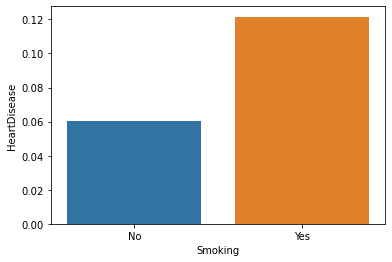

In [100]:
sns.barplot(data=t15.sort_values(by='HeartDisease'),x='Smoking',y='HeartDisease')

In [101]:
## Smoking leads to greater heart risk. Another reason to quit it!

In [102]:
#Encoding

In [103]:
encoded_df = df.copy()

##Label Encoding
le = preprocessing.LabelEncoder()
cols=['HeartDisease', 'Smoking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for i in cols:
    encoded_df[i] = le.fit_transform(encoded_df[i])
    
le_1=le.fit(encoded_df['GenHealth'])
le_1.classes_ = np.array(['Poor', 'Fair','Good','Very good','Excellent'])   ## to assign 0 to Poor and 4 to Excellent
encoded_df['GenHealth'] = le_1.transform(encoded_df['GenHealth'])

## One hot encoding
encoded_df=pd.concat([encoded_df,pd.get_dummies(encoded_df['Race'],prefix='Race',drop_first=True)], axis=1)
encoded_df=pd.concat([encoded_df,pd.get_dummies(encoded_df['Diabetic'],prefix='Diabetic',drop_first=True)], axis=1)
encoded_df=pd.concat([encoded_df,pd.get_dummies(encoded_df['BMI_cat'],prefix='BMI',drop_first=False)], axis=1)
encoded_df=pd.concat([encoded_df,pd.get_dummies(encoded_df['SleepTime_cat'],prefix='SleepTime',drop_first=True)], axis=1)

encoded_df.drop(columns=['Race','Diabetic','BMI_cat','SleepTime_cat'],axis=1,inplace=True)

In [104]:
from IPython.display import display
with pd.option_context('display.max_columns', 30):
    display(encoded_df)

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,Mean_Age,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),BMI_EO,BMI_N,BMI_O,BMI_Owt,BMI_Uwt,SleepTime_Low,SleepTime_Normal
0,0,1,0,3.0,0,0,1,3,1,0,1,57,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
1,0,0,1,0.0,0,0,1,3,0,0,0,80,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,1,0,20.0,0,1,1,1,1,0,0,67,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0.0,0,0,0,2,0,0,1,77,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,0,28.0,1,0,1,3,0,0,0,42,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,7.0,1,1,0,1,1,0,0,62,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
319791,0,1,0,0.0,0,1,1,3,1,0,0,37,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
319792,0,0,0,0.0,0,0,1,2,0,0,0,47,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
319793,0,0,0,0.0,0,0,0,2,0,0,0,27,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [105]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   HeartDisease                      319795 non-null  int32  
 1   Smoking                           319795 non-null  int32  
 2   Stroke                            319795 non-null  int32  
 3   PhysicalHealth                    319795 non-null  float64
 4   DiffWalking                       319795 non-null  int32  
 5   Sex                               319795 non-null  int32  
 6   PhysicalActivity                  319795 non-null  int32  
 7   GenHealth                         319795 non-null  int32  
 8   Asthma                            319795 non-null  int32  
 9   KidneyDisease                     319795 non-null  int32  
 10  SkinCancer                        319795 non-null  int32  
 11  Mean_Age                          319795 non-null  i

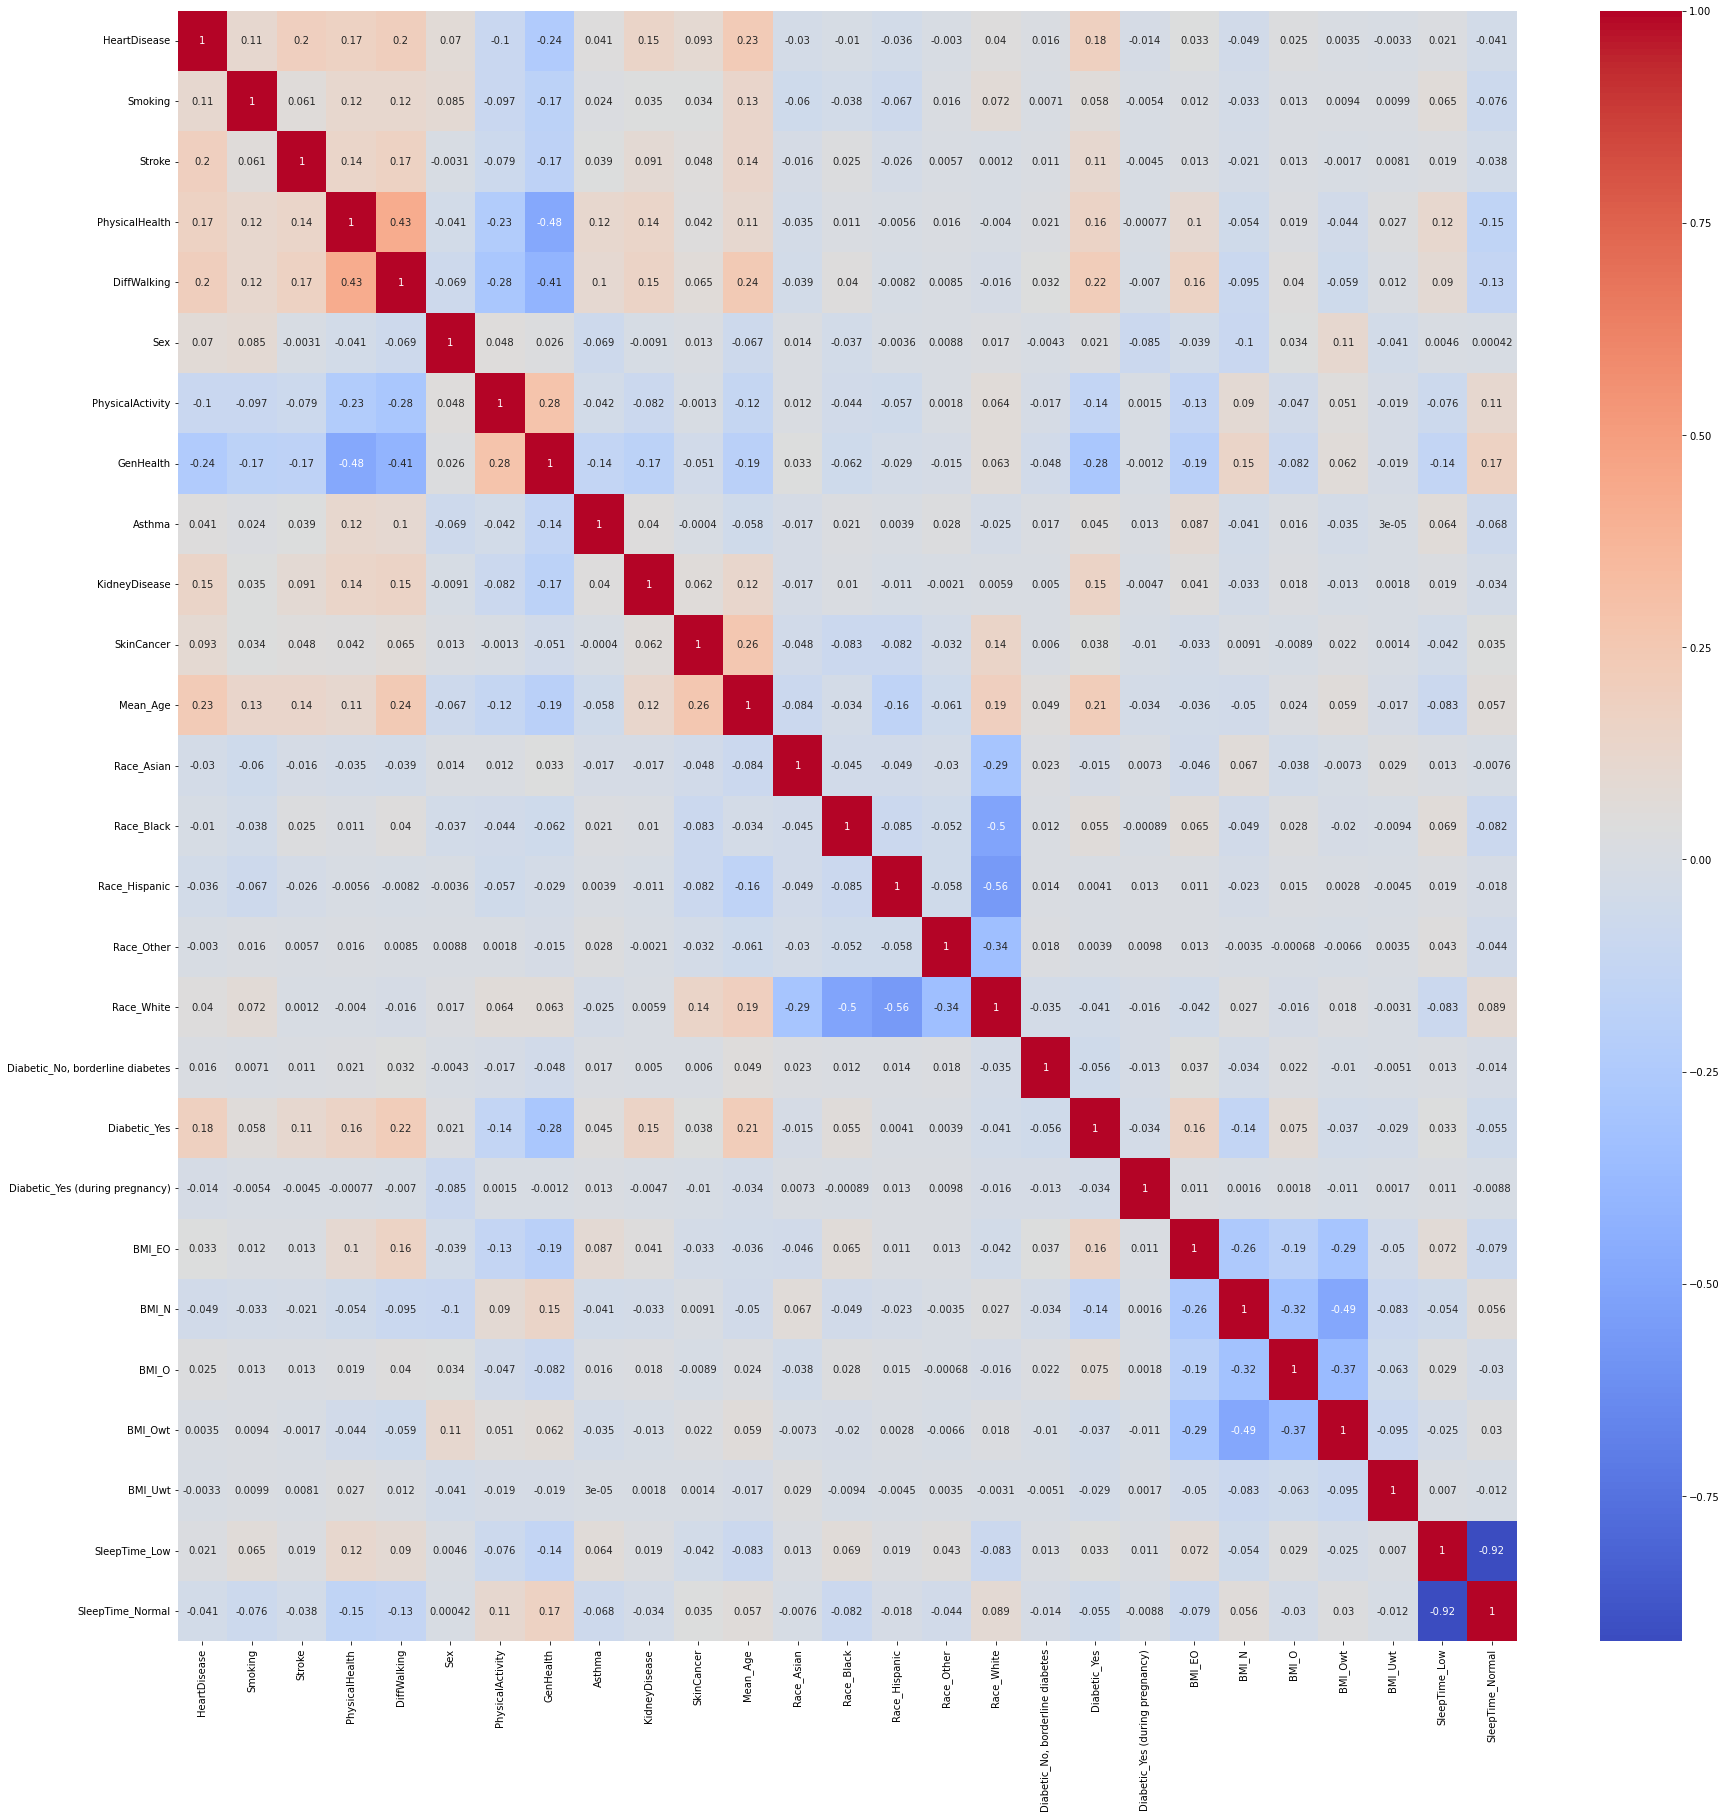

In [106]:
#Check correlation
# es_df.corr()

corrmap = encoded_df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(30,30))
#making of heatmap
df_heatmap = sns.heatmap(encoded_df[top_corr_features].corr(), annot=True, cmap="coolwarm")

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [108]:
X=encoded_df.drop(columns=['HeartDisease'],axis=1)
y=encoded_df['HeartDisease']

col=X.columns

In [109]:
encod_stand_df = sc.fit_transform(X)
es_df = pd.DataFrame(encod_stand_df, columns = col)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(es_df,y,test_size =0.2,random_state = 42)

In [114]:
#Model

In [115]:
#Random Forest

In [141]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train,y_train)


y_pred = model_rf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9036257602526618

			Classification report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.36      0.13      0.19      5592

    accuracy                           0.90     63959
   macro avg       0.64      0.55      0.57     63959
weighted avg       0.87      0.90      0.88     63959



In [142]:
## Since this is an imbalanced dataset, so we focus on better precision or recall than accuracy of the minority class. 
## Recall is much preferred in this case since its better to detect a heart patient at the cost of more False positives rather
## than high precision where we might ignore a lot of True cases (heart risk patients) to improve our correct predictions.

## (Its better to tell a false result to a no heart risk patient than telling a heart patient, as the former might cause 
## unnecessary doctor visit but the later might lead to the ignore of an underlying disease, which is obviously much worse.)

In [143]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.set_params(n_estimators=500, class_weight="balanced",max_depth=30,min_samples_split= 30,min_samples_leaf=24)
model_rf.fit(X_train,y_train)

y_pred = model_rf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.7464782126049501

			Classification report
               precision    recall  f1-score   support

           0       0.97      0.74      0.84     58367
           1       0.23      0.78      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



In [ ]:
print('Cross validation score: ',cross_val_score(model_rf, X_train, y_train, cv=10).mean())

In [ ]:
plot_prc(model_rf,X_test,y_test)

In [ ]:
plot_roc(model_rf,X_test,y_test)

In [ ]:
#Logistic Regression

In [116]:
model_lr = LogisticRegression(class_weight='balanced')

model_lr.fit(X_train, y_train)    

y_pred = model_lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

C:\Users\the_b\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7511530824434404

			Classification report
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     58367
           1       0.23      0.78      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



C:\Users\the_b\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


C:\Users\the_b\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


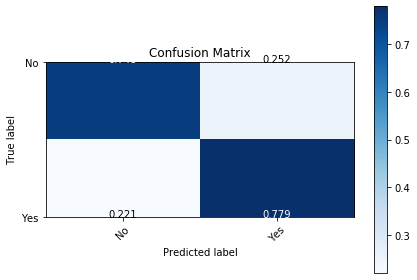

In [117]:
plot_confusion_matrix(model_lr,X_test,y_test,normalize=True)

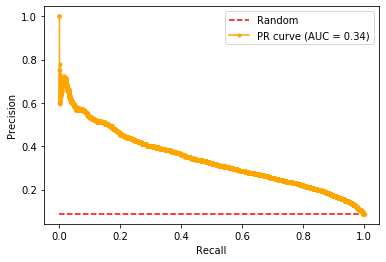

In [118]:
plot_prc(model_lr,X_test,y_test)

In [161]:
#Naive Bayes
#No need for balanced weights since NB handles it by default
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

model_nb.fit(X_train, y_train)    

y_pred = model_nb.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.82473146859707

			Classification report
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     58367
           1       0.26      0.52      0.34      5592

    accuracy                           0.82     63959
   macro avg       0.60      0.69      0.62     63959
weighted avg       0.89      0.82      0.85     63959



In [ ]:
# #SVM
# from sklearn.svm import SVC
# model_svm = SVC(kernel='linear', class_weight='balanced')

# model_svm.fit(X_train, y_train)    

# y_pred = model_svm.predict(X_test)
# print("Accuracy:",accuracy_score(y_test, y_pred))
# print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

In [128]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(class_weight='balanced')

model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.807720570990791

			Classification report
               precision    recall  f1-score   support

           0       0.93      0.85      0.89     58367
           1       0.19      0.37      0.25      5592

    accuracy                           0.81     63959
   macro avg       0.56      0.61      0.57     63959
weighted avg       0.87      0.81      0.83     63959



In [120]:
#XGB Classifier
from xgboost import XGBClassifier

params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':9
        }
          
model_xgb = XGBClassifier(**params)

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9140699510623993

			Classification report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.55      0.09      0.15      5592

    accuracy                           0.91     63959
   macro avg       0.74      0.54      0.55     63959
weighted avg       0.89      0.91      0.88     63959



In [118]:
pip install xgboost
